## Multiple Models 

Se importa la base de datos. 

In [21]:
#Importando paquetes

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns; sns.set()
%matplotlib inline

In [11]:
#Leyendo datos

df = pd.read_csv("../minute_weather.csv")
df.shape

(1587257, 13)

In [12]:
#Podemos ver muchos 0 y NaN en lluvia
df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [13]:
#Son demasiados datos, entonces quitar el 10%
sampled_df = df[(df['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [14]:
#Analizando 
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937510,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [15]:
#Estos datos fueron tomados en una sequía, y como podemos ver hay demasiadas columnas con "0" en lluvia y en duración de lluvia
sampled_df[sampled_df['rain_accumulation'] == 0].shape
#Estos datos fueron tomados en una sequía, y como podemos ver hay demasiadas columnas con "0" en lluvia y en duración de lluvia
sampled_df[sampled_df['rain_duration'] == 0].shape
#Eliminandolos
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [16]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]
#Eliminamos 46 filas
rows_before - rows_after

46

In [17]:
#Columnas
sampled_df.columns
#Los features que nos importan
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']
#Haciendo dataframe con las que nos interesan
select_df = sampled_df[features]
#Mostrar las columnas
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [18]:
#Mostrarla
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


In [19]:
import numpy as np
from sklearn.mixture import GaussianMixture

In [26]:
X = select_df.to_numpy()
X

array([[912.3 ,  64.76,  97.  , ..., 106.  ,   1.6 ,  60.5 ],
       [912.3 ,  62.24, 144.  , ..., 167.  ,   1.8 ,  38.5 ],
       [912.2 ,  63.32, 100.  , ..., 122.  ,   2.5 ,  58.3 ],
       ...,
       [915.9 ,  75.56, 344.  , ..., 352.  ,   1.7 ,  48.  ],
       [915.9 ,  75.2 , 359.  , ...,   9.  ,   1.6 ,  46.3 ],
       [915.9 ,  74.84,   6.  , ...,  20.  ,   1.9 ,  46.1 ]])

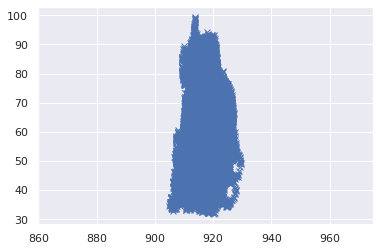

In [27]:
plt.plot(X[:,0], X[:,1], 'bx')
plt.axis('equal')
plt.show()

In [29]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

GaussianMixture(n_components=4)

In [30]:
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[917.44971256  64.59016671 341.26818051   1.49314458  21.11167002
    2.08429146  42.31753377]
 [915.62849721  60.44638752 197.40891717   3.69614933 205.98475411
    4.30498642  57.56151464]
 [918.49675321  62.97860541  40.83821185   3.12551696  53.31328712
    3.81959568  33.07342036]
 [916.90753588  62.33376529 190.5501036    1.51949403 218.83460026
    2.11497148  47.54810719]]


[[[ 7.23720917e+00 -5.97804724e+00  6.44198960e-01 -1.01633905e-01
    2.64406055e+00 -1.13961831e-01 -2.28676702e+00]
  [-5.97804724e+00  1.65765343e+02  8.06157357e+00 -1.30310392e+00
   -2.00167570e+00 -1.68875406e+00 -2.27947299e+02]
  [ 6.44198960e-01  8.06157357e+00  4.12464441e+02  3.76863929e+00
   -2.66003703e+01  2.66936075e+00 -4.57376715e+01]
  [-1.01633905e-01 -1.30310392e+00  3.76863929e+00  1.36740298e+00
   -5.50721089e+00  1.60674773e+00  9.54075361e-01]
  [ 2.64406055e+00 -2.00167570e+00 -2.66003703e+01 -5.50721089e+00
    5.34781868e+02 -4.91112309e+00  1.59187951e+01]
  [-1.13961831e-01

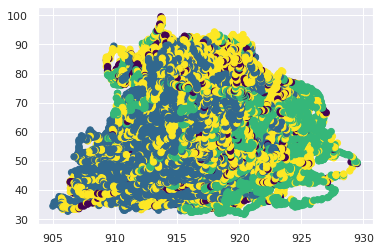

In [32]:
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [33]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.    0.042 0.957]
 [0.    0.002 0.    0.998]
 [0.    0.    0.002 0.998]
 [0.    0.    0.122 0.878]
 [0.    0.    0.842 0.158]]


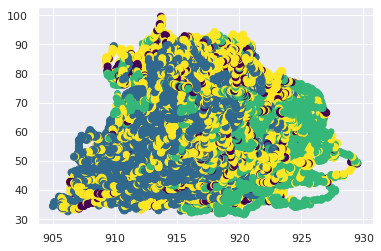

In [34]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [37]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = select_df.corr()
print (corrMatrix)

                    air_pressure  air_temp  avg_wind_direction  \
air_pressure            1.000000  0.046564           -0.194157   
air_temp                0.046564  1.000000           -0.016446   
avg_wind_direction     -0.194157 -0.016446            1.000000   
avg_wind_speed         -0.080214 -0.209107           -0.032762   
max_wind_direction     -0.217855 -0.047065            0.714510   
max_wind_speed         -0.062675 -0.208895           -0.031899   
relative_humidity      -0.375733 -0.620038            0.206049   

                    avg_wind_speed  max_wind_direction  max_wind_speed  \
air_pressure             -0.080214           -0.217855       -0.062675   
air_temp                 -0.209107           -0.047065       -0.208895   
avg_wind_direction       -0.032762            0.714510       -0.031899   
avg_wind_speed            1.000000            0.016660        0.985079   
max_wind_direction        0.016660            1.000000        0.017274   
max_wind_speed            0

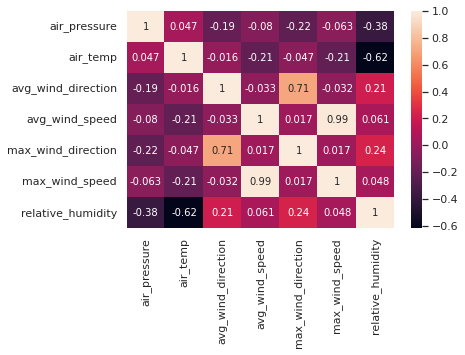

In [38]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [39]:
#Los features que nos importan
features = ['air_pressure', 'air_temp','max_wind_direction','relative_humidity']
#Haciendo dataframe con las que nos interesan
select_df = sampled_df[features]
#Mostrar las columnas
select_df.columns

Index(['air_pressure', 'air_temp', 'max_wind_direction', 'relative_humidity'], dtype='object')

In [40]:
X = select_df.to_numpy()
X

array([[912.3 ,  64.76, 106.  ,  60.5 ],
       [912.3 ,  62.24, 167.  ,  38.5 ],
       [912.2 ,  63.32, 122.  ,  58.3 ],
       ...,
       [915.9 ,  75.56, 352.  ,  48.  ],
       [915.9 ,  75.2 ,   9.  ,  46.3 ],
       [915.9 ,  74.84,  20.  ,  46.1 ]])

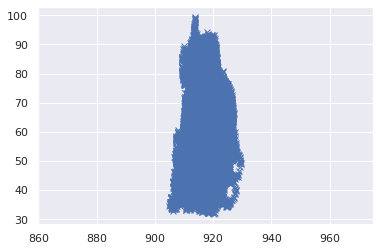

In [41]:
plt.plot(X[:,0], X[:,1], 'bx')
plt.axis('equal')
plt.show()

In [42]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

GaussianMixture(n_components=4)

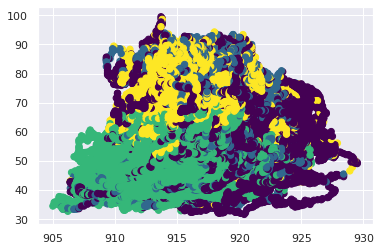

In [43]:
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

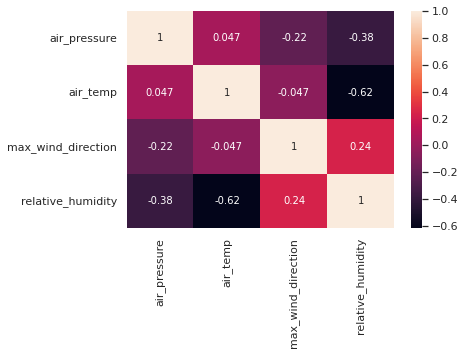

In [44]:
corrMatrix = select_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [45]:
#Extraido de https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [46]:
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

TypeError: 'GaussianMixture' object is not callable